In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [70]:
#df for withscaked data
#data for with out scaled
df = pd.read_csv("cardio_train_cleaned.csv")
data=pd.read_csv("cardio_train_cleaned.csv")

In [56]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,21914,1,151,67.0,120,80,2,2,0,0,0,0,29.384676
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62473,19699,1,172,70.0,130,90,1,1,0,0,1,1,23.661439
62474,21074,1,165,80.0,150,80,1,1,0,0,1,1,29.384757
62475,19240,2,168,76.0,120,80,1,1,1,0,1,0,26.927438
62476,22431,1,163,72.0,135,80,1,2,0,0,0,1,27.099251


In [58]:
num_col=[]
cat_col=[]
bin_col=[]
for col in df.columns:
    if df[col].nunique() == 2:
        bin_col.append(col)
    elif df[col].nunique() <= 10:
        cat_col.append(col)
    else:
        num_col.append(col)

print(cat_col)
print(num_col)
print(bin_col)

['cholesterol', 'gluc']
['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'bmi']
['gender', 'smoke', 'alco', 'active', 'cardio']


In [60]:
df=pd.get_dummies(df,columns=cat_col,drop_first=True)

In [68]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,bmi,cholesterol_2,cholesterol_3,gluc_2,gluc_3
0,-0.447829,2,0.477132,-0.911275,-1.149108,-0.221505,0,0,1,0,-1.128312,False,False,False,False
1,0.298651,1,-1.115991,0.962731,0.949979,1.081495,0,0,1,1,1.708908,False,True,False,False
2,-0.259073,1,0.078851,-0.748318,0.250284,-1.524504,0,0,0,1,-0.791037,False,True,False,False
3,-0.761066,2,0.609892,0.718296,1.649675,2.384495,0,0,1,1,0.347889,False,False,False,False
4,0.984518,1,-1.779792,-0.503882,-0.449412,-0.221505,0,0,0,0,0.495479,True,False,True,False


In [64]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[num_col]=scaler.fit_transform(df[num_col])


In [66]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,bmi,cholesterol_2,cholesterol_3,gluc_2,gluc_3
0,-0.447829,2,0.477132,-0.911275,-1.149108,-0.221505,0,0,1,0,-1.128312,False,False,False,False
1,0.298651,1,-1.115991,0.962731,0.949979,1.081495,0,0,1,1,1.708908,False,True,False,False
2,-0.259073,1,0.078851,-0.748318,0.250284,-1.524504,0,0,0,1,-0.791037,False,True,False,False
3,-0.761066,2,0.609892,0.718296,1.649675,2.384495,0,0,1,1,0.347889,False,False,False,False
4,0.984518,1,-1.779792,-0.503882,-0.449412,-0.221505,0,0,0,0,0.495479,True,False,True,False


In [72]:
from sklearn.model_selection import train_test_split

X_scale = df.drop("cardio", axis=1)   # features
y_scale = df["cardio"]                # target

# Split data
X_train_scale, X_test_scale, y_train_scale, y_test_scale = train_test_split(
    X_scale, y_scale,
    test_size=0.2,
    random_state=42,
)

In [74]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train_scale,y_train_scale)

C:\Users\tinka\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [76]:
y_pred1=log_model.predict(X_test_scale)

In [78]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred1)

0.7150288092189501

In [80]:
from sklearn import svm
svm=svm.SVC()
svm.fit(X_train_scale,y_train_scale)

SVC()

In [84]:
y_pred2=svm.predict(X_test_scale)
accuracy_score(y_test_scale,y_pred2)

0.6026728553137004

In [86]:
from sklearn.model_selection import train_test_split

X = data.drop("cardio", axis=1)   # features
y = data["cardio"]                # target

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
)

In [88]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [90]:
y_pred3=dt.predict(X_test)
accuracy_score(y_test,y_pred3)

0.6385243277848912

In [94]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(
    n_estimators=120,
    max_depth=12,
    min_samples_leaf=5,
    random_state=42
)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=12, min_samples_leaf=5, n_estimators=120,
                       random_state=42)

In [96]:
y_pred4 = model.predict(X_test)
accuracy_score(y_test, y_pred4)

0.7367157490396927

In [42]:
import pickle
with open("model1.pkl", "wb") as f:
    pickle.dump(model, f, protocol=pickle.HIGHEST_PROTOCOL)


In [98]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [102]:
y_pred5=gbc.predict(X_test)
accuracy_score(y_test,y_pred5)

0.737516005121639

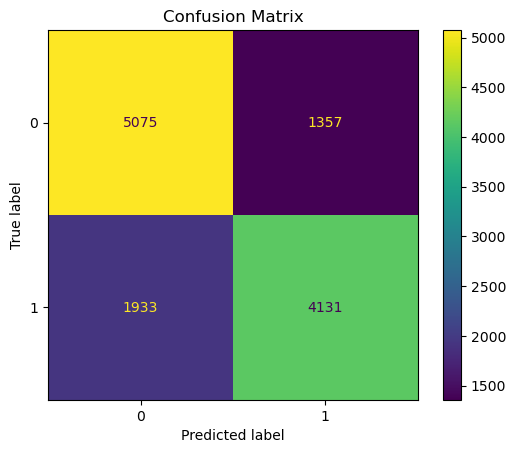

In [104]:
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    precision_score,
    recall_score,
    f1_score,
    classification_report
)
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred4)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()


In [108]:
precision = precision_score(y_test, y_pred4)
recall = recall_score(y_test, y_pred4)
f1 = f1_score(y_test, y_pred4)
print(accuracy_score(y_test,y_pred4))
print("Precision:", round(precision, 4))
print("Recall:", round(recall, 4))
print("F1-Score:", round(f1, 4))
print(cm)

0.7367157490396927
Precision: 0.7527
Recall: 0.6812
F1-Score: 0.7152
[[5075 1357]
 [1933 4131]]
